# Profiling MIEDA's Speed

This notebook examines the speed of MIEDA under varying conditions. 

## Imports 

In [1]:
# let's make sure we are using the correct kernel 
import sys; sys.executable

'/Users/vconstan/Files/Projects/mieda/venv/bin/python'

In [2]:
from mieda.intervals import Merge

In [19]:
# plotting and other things 
import datetime
from ipywidgets import IntProgress
import matplotlib.pyplot as plt
import time
from tqdm.notebook import tqdm

## Computational Time Curve as Input Size Increases 

We will construct a test to see how the speed scales as the number of intervals increases. For this test, we will use the most common scenario, where interval B starts after interval A and ends after interval A. 

In [6]:
# define the default interval which will be updated at each iteration 
seed_interval = [
    {"start": datetime.datetime(2020, 1, 1, 1, 0, 0), "finish": datetime.datetime(2020, 1, 4, 1, 0, 0),
     "set_items": {"1"}}
]

In [7]:
# generate a range of values for the length of the set of intervals 
interval_counts = list(range(0, 10000, 10))
interval_counts[0:10]

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [20]:
# generate the input data 
inputs = list()
for i in tqdm(interval_counts):
    intervals = list() + seed_interval
    for j in range(i):
        # get the last interval 
        update_interval = intervals[-1]
            
        # add 2 hours to the start and end times 
        update_interval["start"] = update_interval["start"] + datetime.timedelta(hours=2)
        update_interval["finish"] = update_interval["finish"] + datetime.timedelta(hours=2)
        
        # update the set items
        update_interval["set_items"] = {str(j)}
        
        intervals.append(update_interval)
        
#     print(len(intervals))
        
    inputs.append(intervals)

In [9]:
inputs[0]

[{'start': datetime.datetime(3159, 8, 28, 1, 0),
  'finish': datetime.datetime(3159, 8, 31, 1, 0),
  'set_items': {'9989'}}]

In [10]:
inputs[1]

[{'start': datetime.datetime(3159, 8, 28, 1, 0),
  'finish': datetime.datetime(3159, 8, 31, 1, 0),
  'set_items': {'9989'}},
 {'start': datetime.datetime(3159, 8, 28, 1, 0),
  'finish': datetime.datetime(3159, 8, 31, 1, 0),
  'set_items': {'9989'}},
 {'start': datetime.datetime(3159, 8, 28, 1, 0),
  'finish': datetime.datetime(3159, 8, 31, 1, 0),
  'set_items': {'9989'}},
 {'start': datetime.datetime(3159, 8, 28, 1, 0),
  'finish': datetime.datetime(3159, 8, 31, 1, 0),
  'set_items': {'9989'}},
 {'start': datetime.datetime(3159, 8, 28, 1, 0),
  'finish': datetime.datetime(3159, 8, 31, 1, 0),
  'set_items': {'9989'}},
 {'start': datetime.datetime(3159, 8, 28, 1, 0),
  'finish': datetime.datetime(3159, 8, 31, 1, 0),
  'set_items': {'9989'}},
 {'start': datetime.datetime(3159, 8, 28, 1, 0),
  'finish': datetime.datetime(3159, 8, 31, 1, 0),
  'set_items': {'9989'}},
 {'start': datetime.datetime(3159, 8, 28, 1, 0),
  'finish': datetime.datetime(3159, 8, 31, 1, 0),
  'set_items': {'9989'}},


In [21]:
# for each, use mieda to overlap the intervals and create new sets in the intervals through a union merge 
# track how long it takes for each set of intervals to arrive at a profile of speed based on the input size 

interval_count = list()
seconds_elapsed = list()
for i in tqdm(inputs):
    interval_count.append(len(i))
    start = time.process_time()
    Merge.union(intervals=i)
    seconds_elapsed.append(time.process_time() - start)

In [40]:
# create a moving average value as well 
N = 10
cumsum, moving_aves = [0], []

for i, x in enumerate(seconds_elapsed, 1):
    cumsum.append(cumsum[i-1] + x)
    if i >= N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        moving_aves.append(moving_ave)

In [41]:
moving_aves_plot = ((len(seconds_elapsed) - len(moving_aves)) * [0]) + moving_aves

/Users/vconstan/Files/Projects/mieda/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


<Figure size 432x288 with 0 Axes>

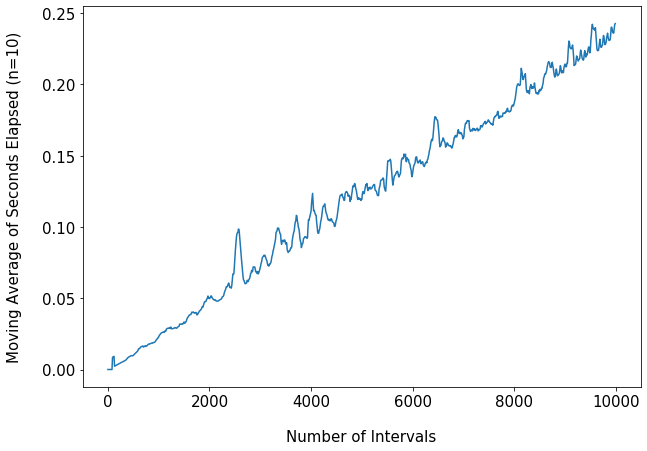

In [62]:
plt.cla()
plt.clf()
fig = plt.figure(figsize=(10,7))
ax = plt.axes()
ax.plot(interval_count, moving_aves_plot)
plt.xlabel("Number of Intervals", labelpad=20)
plt.ylabel("Moving Average of Seconds Elapsed (n=" + str(N) + ")", labelpad=20)
plt.rcParams["font.size"] = "15"
fig.show()


It seems to scale linearly :) 

In [ ]:
# TODO: add a linear regression to get the slope and the rate in which it scales 
# TODO: smooth out the above values 